# numpy.meshgrid
> numpy.meshgrid(*xi, copy=True, sparse=False, indexing='xy')

Return coordinate matrices from coordinate vectors.

Make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate arrays x1, x2,…, xn.

## source

In [ ]:
@array_function_dispatch(_meshgrid_dispatcher)
def meshgrid(*xi, copy=True, sparse=False, indexing='xy'):
    """
    Return coordinate matrices from coordinate vectors.

    Make N-D coordinate arrays for vectorized evaluations of
    N-D scalar/vector fields over N-D grids, given
    one-dimensional coordinate arrays x1, x2,..., xn.

    .. versionchanged:: 1.9
       1-D and 0-D cases are allowed.

    Parameters
    ----------
    x1, x2,..., xn : array_like
        1-D arrays representing the coordinates of a grid.
    indexing : {'xy', 'ij'}, optional
        Cartesian ('xy', default) or matrix ('ij') indexing of output.
        See Notes for more details.

        .. versionadded:: 1.7.0
    sparse : bool, optional
        If True a sparse grid is returned in order to conserve memory.
        Default is False.

        .. versionadded:: 1.7.0
    copy : bool, optional
        If False, a view into the original arrays are returned in order to
        conserve memory.  Default is True.  Please note that
        ``sparse=False, copy=False`` will likely return non-contiguous
        arrays.  Furthermore, more than one element of a broadcast array
        may refer to a single memory location.  If you need to write to the
        arrays, make copies first.

        .. versionadded:: 1.7.0

    Returns
    -------
    X1, X2,..., XN : ndarray
        For vectors `x1`, `x2`,..., 'xn' with lengths ``Ni=len(xi)`` ,
        return ``(N1, N2, N3,...Nn)`` shaped arrays if indexing='ij'
        or ``(N2, N1, N3,...Nn)`` shaped arrays if indexing='xy'
        with the elements of `xi` repeated to fill the matrix along
        the first dimension for `x1`, the second for `x2` and so on.

    Notes
    -----
    This function supports both indexing conventions through the indexing
    keyword argument.  Giving the string 'ij' returns a meshgrid with
    matrix indexing, while 'xy' returns a meshgrid with Cartesian indexing.
    In the 2-D case with inputs of length M and N, the outputs are of shape
    (N, M) for 'xy' indexing and (M, N) for 'ij' indexing.  In the 3-D case
    with inputs of length M, N and P, outputs are of shape (N, M, P) for
    'xy' indexing and (M, N, P) for 'ij' indexing.  The difference is
    illustrated by the following code snippet::

        xv, yv = np.meshgrid(x, y, sparse=False, indexing='ij')
        for i in range(nx):
            for j in range(ny):
                # treat xv[i,j], yv[i,j]

        xv, yv = np.meshgrid(x, y, sparse=False, indexing='xy')
        for i in range(nx):
            for j in range(ny):
                # treat xv[j,i], yv[j,i]

    In the 1-D and 0-D case, the indexing and sparse keywords have no effect.

    See Also
    --------
    mgrid : Construct a multi-dimensional "meshgrid" using indexing notation.
    ogrid : Construct an open multi-dimensional "meshgrid" using indexing
            notation.

    Examples
    --------
    >>> nx, ny = (3, 2)
    >>> x = np.linspace(0, 1, nx)
    >>> y = np.linspace(0, 1, ny)
    >>> xv, yv = np.meshgrid(x, y)
    >>> xv
    array([[0. , 0.5, 1. ],
           [0. , 0.5, 1. ]])
    >>> yv
    array([[0.,  0.,  0.],
           [1.,  1.,  1.]])
    >>> xv, yv = np.meshgrid(x, y, sparse=True)  # make sparse output arrays
    >>> xv
    array([[0. ,  0.5,  1. ]])
    >>> yv
    array([[0.],
           [1.]])

    `meshgrid` is very useful to evaluate functions on a grid.

    >>> import matplotlib.pyplot as plt
    >>> x = np.arange(-5, 5, 0.1)
    >>> y = np.arange(-5, 5, 0.1)
    >>> xx, yy = np.meshgrid(x, y, sparse=True)
    >>> z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
    >>> h = plt.contourf(x, y, z)
    >>> plt.axis('scaled')
    >>> plt.show()

    """
    ndim = len(xi)


    if indexing not in ['xy', 'ij']:
        raise ValueError(
            "Valid values for `indexing` are 'xy' and 'ij'.")


    s0 = (1,) * ndim
    output = [np.asanyarray(x).reshape(s0[:i] + (-1,) + s0[i + 1:])
              for i, x in enumerate(xi)]


    if indexing == 'xy' and ndim > 1:
        # switch first and second axis
        output[0].shape = (1, -1) + s0[2:]
        output[1].shape = (-1, 1) + s0[2:]


    if not sparse:
        # Return the full N-D matrix (not only the 1-D vector)
        output = np.broadcast_arrays(*output, subok=True)


    if copy:
        output = [x.copy() for x in output]


    return output

# Parameters

> x1, x2,…, xn：array_like  
1-D arrays representing the coordinates of a grid.

表示网格坐标的一维数组

> indexing:{‘xy’, ‘ij’}, optional  
Cartesian (‘xy’, default) or matrix (‘ij’) indexing of output. See Notes for more details.

('xy'[笛卡尔],'ij'[矩阵])，可选。默认是'xy'

> sparse:bool, optional  
If True a sparse grid is returned in order to conserve memory. Default is False.

稀疏(sparse)：bool，可选。  
如果为True为了节省内存会返回一个稀疏矩阵，默认为False。

> copy:bool, optional  
If False, a view into the original arrays are returned in order to conserve memory. Default is True. Please note that sparse=False, copy=False will likely return non-contiguous arrays. Furthermore, more than one element of a broadcast array may refer to a single memory location. If you need to write to the arrays, make copies first.

复制(copy)：bool，可选。  
如果为False则为了节省内存返回源始的视图，默认为True。请注意，sparse=False, copy=False可能会返回非连续数组。此外，广播数组的多个元素可以引用单个内存位置。如果需要写入数组，请先进行复制。

# Returns

> X1, X2,…, XN:ndarray  
For vectors x1, x2,…,‘xn’ with lengths Ni=len(xi), return (N1, N2, N3,...Nn) shaped arrays if indexing=’ij’ or (N2, N1, N3,...Nn) shaped arrays if indexing=’xy’ with the elements of xi repeated to fill the matrix along the first dimension for x1, the second for x2 and so on.

In [ ]:
xv, yv = np.meshgrid(x, y, sparse=False, indexing='ij')
for i in range(nx):
    for j in range(ny):
        # treat xv[i,j], yv[i,j]

xv, yv = np.meshgrid(x, y, sparse=False, indexing='xy')
for i in range(nx):
    for j in range(ny):
        # treat xv[j,i], yv[j,i]

In [3]:
import numpy as np

nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
xv

array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ]])

In [4]:
yv

array([[0., 0., 0.],
       [1., 1., 1.]])

In [5]:
xv, yv = np.meshgrid(x, y, sparse=True)  # make sparse output arrays

In [6]:
xv

array([[0. , 0.5, 1. ]])

In [7]:
yv

array([[0.],
       [1.]])

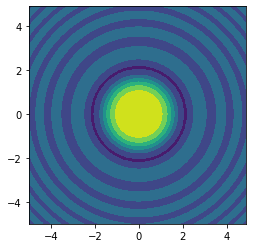

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x, y, z)
plt.axis('scaled')
plt.show()